In [265]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dg-cab-investment/Cab_Data.csv
/kaggle/input/dg-cab-investment/City.csv
/kaggle/input/dg-cab-investment/Customer_ID.csv
/kaggle/input/dg-cab-investment/Transaction_ID.csv


In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [267]:
cab_data = pd.read_csv("/kaggle/input/dg-cab-investment/Cab_Data.csv")
customer_data = pd.read_csv("/kaggle/input/dg-cab-investment/Customer_ID.csv")
transaction_data = pd.read_csv("/kaggle/input/dg-cab-investment/Transaction_ID.csv")
city_data = pd.read_csv("/kaggle/input/dg-cab-investment/City.csv")

In [268]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [269]:
customer_data.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [270]:
transaction_data.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [271]:
city_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [272]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [273]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [274]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [275]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


# ***Data Cleaning***

**Handle data types**

In [276]:
# Check the datatype of 'Date of Travel'
print(cab_data['Date of Travel'].dtype)

int64


In [277]:
cab_data['Date of Travel']

0         42377
1         42375
2         42371
3         42376
4         42372
          ...  
359387    43108
359388    43104
359389    43105
359390    43105
359391    43102
Name: Date of Travel, Length: 359392, dtype: int64

In [278]:
print(city_data['Population'].dtype)
# Convert Population to inetgers in city_data
city_data['Population'] = city_data['Population'].str.replace(',', '').astype(int)
city_data['Population']

object


0     8405837
1     1955130
2     1595037
3     1339155
4     1177609
5     1030185
6      959307
7      943999
8      942908
9      814885
10     754233
11     698371
12     671238
13     631442
14     629591
15     545776
16     542085
17     418859
18     327225
19     248968
Name: Population, dtype: int64

In [279]:
# Convert Users to integers in city_data
city_data['Users'] = city_data['Users'].str.replace(',', '').astype(int)
city_data['Users']

0     302149
1     164468
2     144132
3      17675
4      27247
5      12994
6      69995
7       6133
8      22157
9      24701
10     12421
11     14978
12     25063
13      5712
14    213609
15      7044
16      3643
17    127001
18      9270
19     80021
Name: Users, dtype: int64

**Handle duplicates**

In [280]:
# Remove duplicates
cab_data = cab_data.drop_duplicates()
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [281]:
customer_data = customer_data.drop_duplicates()
customer_data

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [282]:
transaction_data = transaction_data.drop_duplicates()
transaction_data

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [283]:
city_data = city_data.drop_duplicates()
city_data

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247
5,ORANGE COUNTY,1030185,12994
6,SAN DIEGO CA,959307,69995
7,PHOENIX AZ,943999,6133
8,DALLAS TX,942908,22157
9,ATLANTA GA,814885,24701


**Handle missing values**

In [284]:
# Check for missing values in all datasets
print(cab_data.isnull().sum())

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64


In [285]:
print(customer_data.isnull().sum())

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64


In [286]:
print(transaction_data.isnull().sum())

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64


In [287]:
print(city_data.isnull().sum())

City          0
Population    0
Users         0
dtype: int64


# Data Merging

In [288]:
# Merge cab_data with transaction_data on 'Transaction ID'
cab_transaction_merged = pd.merge(cab_data, transaction_data, on='Transaction ID', how='left')
cab_transaction_merged 

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card
...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card


In [289]:
# Merge cab_transaction_merged with customer_data on 'Customer ID'
cab_customer_merged = pd.merge(cab_transaction_merged, customer_data, on='Customer ID', how='left')
cab_customer_merged 

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423


In [290]:
# Merge cab_customer_merged with city_data on 'City'
cab_full_data = pd.merge(cab_customer_merged, city_data, on= 'City', how= 'left')
cab_full_data 

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,814885,24701
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327,814885,24701
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536,814885,24701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651,418859,127001
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528,418859,127001
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966,418859,127001
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423,418859,127001


# Exploratory Data Analysis (EDA)

**1.Number of rides by company**

In [291]:
# Group by Company and count the number of transactions
company_rides = cab_full_data.groupby('Company')['Transaction ID'].count()
company_rides

Company
Pink Cab       84711
Yellow Cab    274681
Name: Transaction ID, dtype: int64

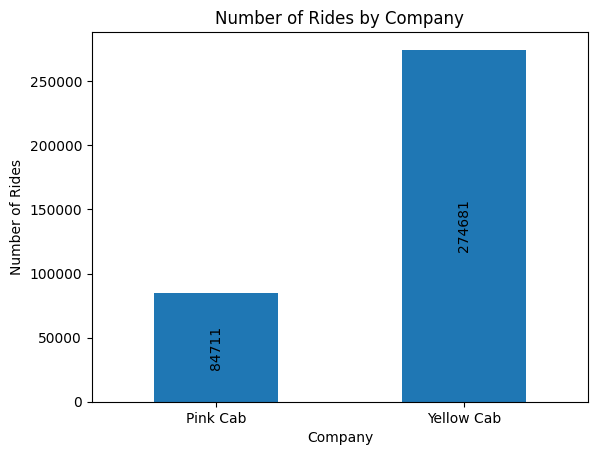

In [292]:
# Visualize
ax=company_rides.plot(kind='bar', title='Number of Rides by Company', ylabel='Number of Rides')
plt.xticks(rotation=0)
# Adding values on bars
for bars in ax.containers:
    ax.bar_label(bars,labels=[f'{(label):.0f}' for label in bars.datavalues], label_type='center', fontsize=10, color='black', rotation=90)
plt.show()

**Number of Users by Company**

In [293]:
company_user_count = cab_full_data.groupby('Company')['Customer ID'].nunique()
company_user_count

Company
Pink Cab      32330
Yellow Cab    39896
Name: Customer ID, dtype: int64

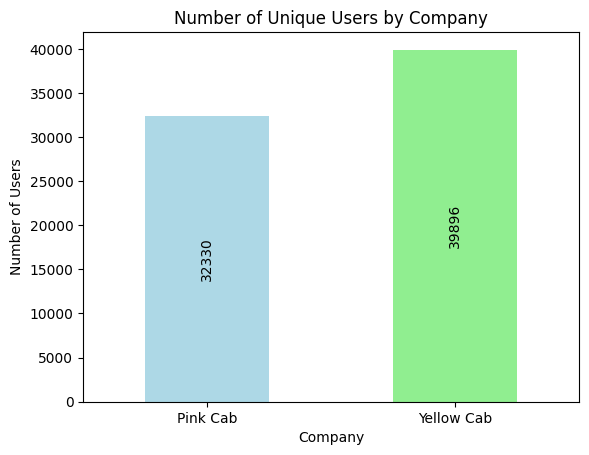

In [294]:
ax=company_user_count.plot(kind='bar', title='Number of Unique Users by Company', color=['lightblue', 'lightgreen'])
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
for bars in ax.containers:
    ax.bar_label(bars,labels=[f'{(label):.0f}' for label in bars.datavalues], label_type='center', fontsize=10, color='black', rotation=90)
plt.show()



* Yellow Cab has a larger user base with approximately 39,896 unique users compared to Pink Cab’s 32,330 unique users.
* The difference in user base size indicates that Yellow Cab is more popular or has a broader reach than Pink Cab.
* The graph visually highlights the significant gap in the number of unique users between the two companies, with Yellow Cab leading by over 7,500 users.

**2. Average Spend by City**

In [295]:
# Calculate average price charged per city
city_spending = cab_full_data.groupby(['City','Company'])['Price Charged'].mean().sort_values(ascending=False).reset_index()
city_spending

,City,Company,Price Charged
0,NEW YORK NY,Yellow Cab,604.841911
1,SILICON VALLEY,Yellow Cab,506.499502
2,DALLAS TX,Yellow Cab,493.807790
3,DENVER CO,Yellow Cab,443.235413
4,ORANGE COUNTY,Yellow Cab,438.548623
5,MIAMI FL,Yellow Cab,432.944872
6,PHOENIX AZ,Yellow Cab,428.737417
7,ATLANTA GA,Yellow Cab,422.413446
8,AUSTIN TX,Yellow Cab,422.248940
9,LOS ANGELES CA,Yellow Cab,416.231136


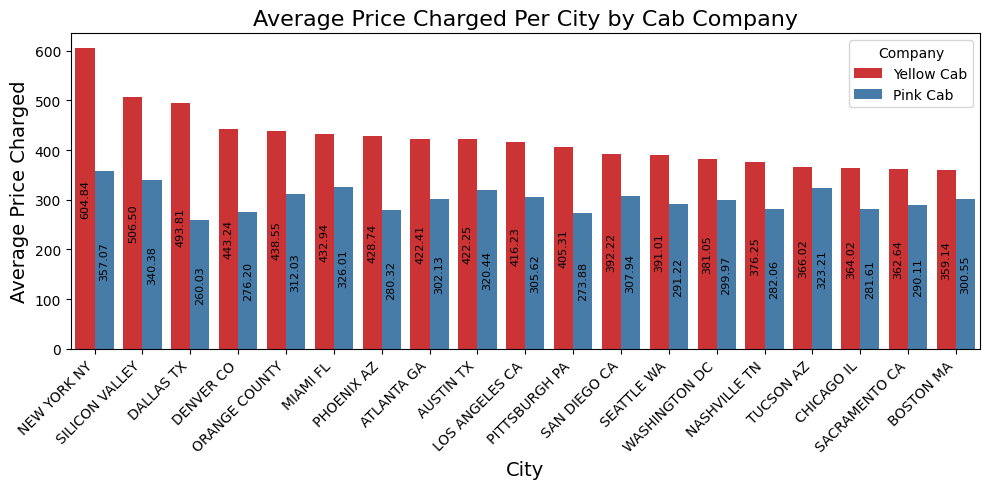

In [296]:
# Visualization
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='City', y='Price Charged', hue='Company', data=city_spending, palette='Set1')
plt.title('Average Price Charged Per City by Cab Company', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Average Price Charged', fontsize=14)
plt.xticks(rotation=45, ha='right')

for bars in ax.containers:
    ax.bar_label(bars, fmt='%.2f', label_type='center', fontsize=8, rotation= 90)

plt.tight_layout()
plt.show()

* Yellow Cab charges higher prices than Pink Cab in most cities.
* New York NY has the highest average price for both companies, with Yellow Cab charging around $600 and Pink Cab around $360.
* Dallas TX and Boston MA shows Lowest prices for Pink Cab and Yellow Cab respectively.

**Spending by Customer Demographics (Gender and Age)**

In [297]:
gender_spending = cab_full_data.groupby(['Gender','Company'])['Price Charged'].sum().sort_values(ascending=False).reset_index()
gender_spending

,Gender,Company,Price Charged
0,Male,Yellow Cab,73123588.77
1,Female,Yellow Cab,52730298.42
2,Male,Pink Cab,14686032.97
3,Female,Pink Cab,11642218.36


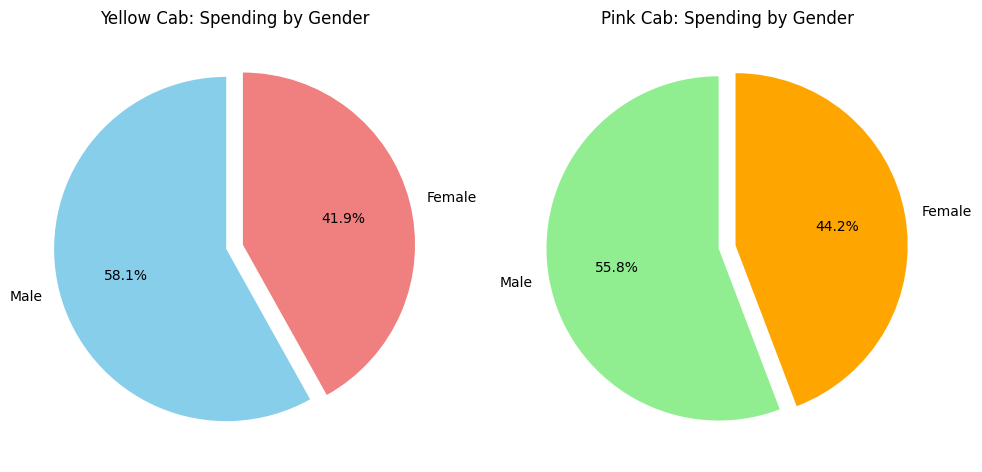

In [298]:
#  Filter data for each company
yellow_cab_spending = gender_spending[gender_spending['Company'] == 'Yellow Cab']
pink_cab_spending = gender_spending[gender_spending['Company'] == 'Pink Cab']

#  Create two pie charts for each company's spending by gender
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Yellow Cab Pie Chart
ax[0].pie(yellow_cab_spending['Price Charged'], labels=yellow_cab_spending['Gender'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'], explode=(0.05, 0.05))
ax[0].set_title('Yellow Cab: Spending by Gender')

# Pink Cab Pie Chart
ax[1].pie(pink_cab_spending['Price Charged'], labels=pink_cab_spending['Gender'], autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'orange'], explode=(0.05, 0.05))
ax[1].set_title('Pink Cab: Spending by Gender')

# Show the plot
plt.tight_layout()
plt.show()

These charts indicate that Spending by Customer Demographics by gender for both companies, males contribute to a higher percentage of spending than females, with Yellow Cab having a slightly larger gender gap compared to Pink Cab.

/tmp/ipykernel_30/652585064.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = cab_full_data.groupby(['Age Group', 'Company']).agg({'Price Charged': 'mean', 'Transaction ID': 'count'}).unstack()


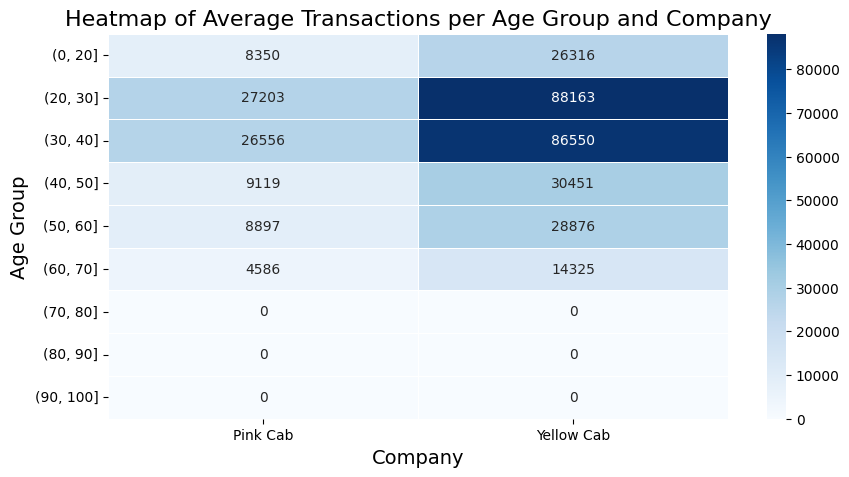

In [299]:
# Create age bins for heatmap
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
cab_full_data['Age Group'] = pd.cut(cab_full_data['Age'], bins=age_bins)

# Create a pivot table for heatmap
heatmap_data = cab_full_data.groupby(['Age Group', 'Company']).agg({'Price Charged': 'mean', 'Transaction ID': 'count'}).unstack()

# Plot Heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data['Transaction ID'], annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Heatmap of Average Transactions per Age Group and Company', fontsize=16)
plt.xlabel('Company', fontsize=14)
plt.ylabel('Age Group', fontsize=14)
plt.show()

* Yellow Cab has higher transaction volumes across all age groups compared to Pink Cab.
* The highest concentration of transactions for both companies is in the ‘20-30’ and ‘30-40’ age brackets.
* Darker shades indicate higher transaction volumes, with Yellow Cab showing significantly more activity overall.

**Total Revenue by Company**

In [300]:
company_revenue = cab_full_data.groupby('Company')['Price Charged'].sum()
company_revenue

Company
Pink Cab      2.632825e+07
Yellow Cab    1.258539e+08
Name: Price Charged, dtype: float64

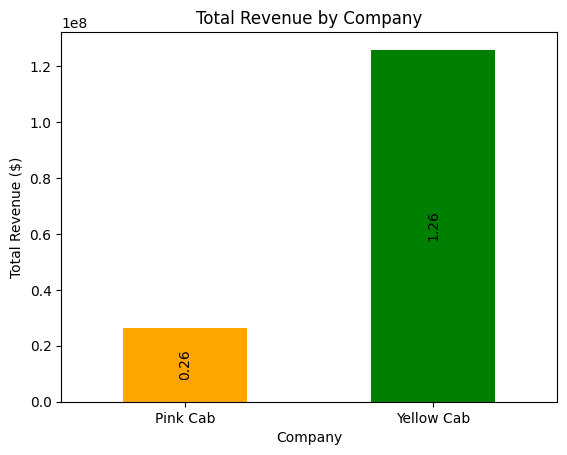

In [301]:
ax=company_revenue.plot(kind='bar', title='Total Revenue by Company', color=['orange', 'green'])
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=0)
for bars in ax.containers:
    ax.bar_label(bars,labels=[f'{(label / 1e8):.2f}' for label in bars.datavalues], label_type='center', fontsize=10, color='black', rotation=90)
plt.show()

* Yellow Cab has significantly higher total revenue at $1.26 million compared to Pink Cab’s $0.26 million.
* The chart visually highlights the substantial revenue gap between the two companies, indicating Yellow Cab’s stronger financial performance.
* The y-axis scale shows revenue in tens of millions, emphasizing the large difference in earnings.

**3. City-wise cab usage**

In [302]:
# Group by City and sum the Users
city_users = cab_full_data.groupby(['City','Company'])['Users'].sum().sort_values(ascending=False).reset_index()
city_users

,City,Company,Users
0,NEW YORK NY,Yellow Cab,25960037782
1,CHICAGO IL,Yellow Cab,7773415552
2,WASHINGTON DC,Yellow Cab,5085755045
3,NEW YORK NY,Pink Cab,4220115083
4,LOS ANGELES CA,Yellow Cab,4059910176
5,LOS ANGELES CA,Pink Cab,2863182180
6,BOSTON MA,Yellow Cab,1960994626
7,CHICAGO IL,Pink Cab,1539584948
8,SAN DIEGO CA,Pink Cab,746986640
9,SAN DIEGO CA,Yellow Cab,687070920


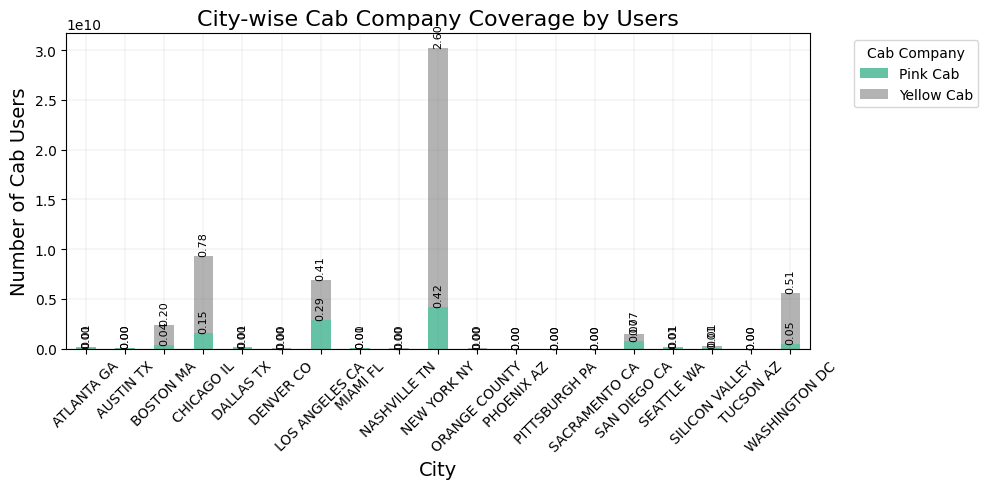

In [303]:
citywise_company_pivot = city_users.pivot(index='City', columns='Company', values='Users')

#  Visualization: Stacked Bar Chart
plt.figure(figsize=(10, 5))
ax=citywise_company_pivot.plot(kind='bar', stacked=True, colormap='Set2', ax=plt.gca())

plt.title('City-wise Cab Company Coverage by Users', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Number of Cab Users', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, which='major', axis='both', color='gray', linestyle='-', linewidth=0.1)

for bars in ax.containers:
    ax.bar_label(bars,labels=[f'{(label / 1e10):.2f}' for label in bars.datavalues], label_type='edge', fontsize=8, color='black', rotation=90)
    
plt.legend(title='Cab Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

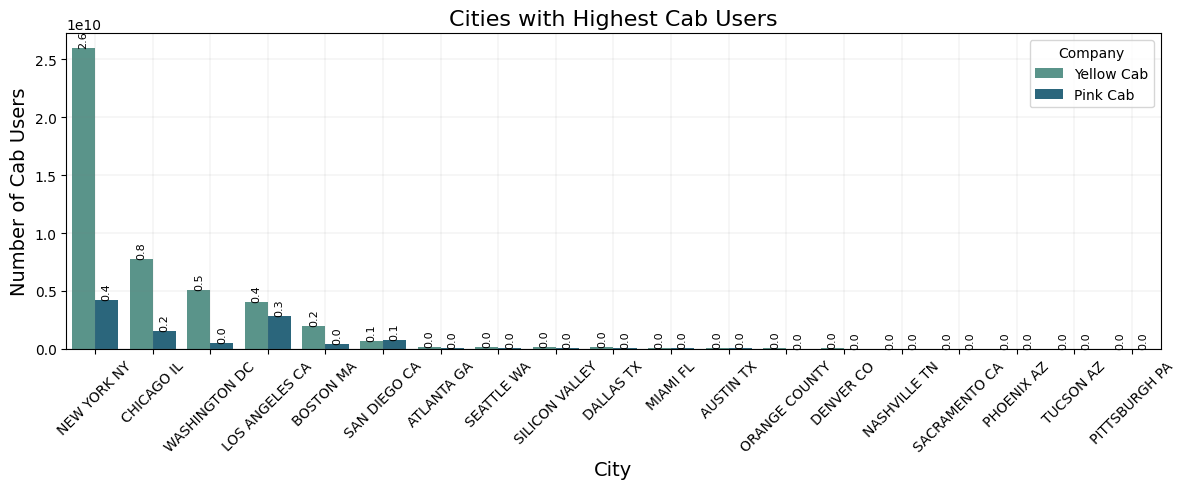

In [304]:
# Visualization of the top cities with highest cab users
plt.figure(figsize=(12, 5))
ax = sns.barplot(x='City', y='Users', hue='Company', data=city_users, palette='crest')

plt.title('Cities with Highest Cab Users', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Number of Cab Users', fontsize=14)
plt.grid(True, which='major', axis='both', color='gray', linestyle='-', linewidth=0.1)
plt.xticks(rotation=45)

for bars in ax.containers:
    ax.bar_label(bars,labels=[f'{(label / 1e10):.1f}' for label in bars.datavalues], label_type='edge', fontsize=8, color='black', rotation=90)

plt.tight_layout()
plt.show()

**Seasonality in Cab Usage**

In [305]:
print(cab_full_data.dtypes)

Transaction ID           int64
Date of Travel           int64
Company                 object
City                    object
KM Travelled           float64
Price Charged          float64
Cost of Trip           float64
Customer ID              int64
Payment_Mode            object
Gender                  object
Age                      int64
Income (USD/Month)       int64
Population               int64
Users                    int64
Age Group             category
dtype: object


In [306]:
# Check the first few entries in the Date of Travel column
print(cab_full_data['Date of Travel'].head())
print(cab_full_data['Date of Travel'].dtype)  # Check the data type of the column

0    42377
1    42375
2    42371
3    42376
4    42372
Name: Date of Travel, dtype: int64
int64


In [307]:
# If the Date of Travel is already a datetime object
if pd.api.types.is_datetime64_any_dtype(cab_full_data['Date of Travel']):
    cab_full_data['Month'] = cab_full_data['Date of Travel'].dt.month
    cab_full_data['Year'] = cab_full_data['Date of Travel'].dt.year
else:
    # If not, handle the conversion (if needed)
    cab_full_data['Date of Travel'] = pd.to_datetime(cab_full_data['Date of Travel'], origin='1899-12-30', unit='D')
    cab_full_data['Month'] = cab_full_data['Date of Travel'].dt.month
    cab_full_data['Year'] = cab_full_data['Date of Travel'].dt.year

# Verify the results
print(cab_full_data[['Date of Travel', 'Year', 'Month']].head())

  Date of Travel  Year  Month
0     2016-01-08  2016      1
1     2016-01-06  2016      1
2     2016-01-02  2016      1
3     2016-01-07  2016      1
4     2016-01-03  2016      1


<Figure size 1000x500 with 0 Axes>

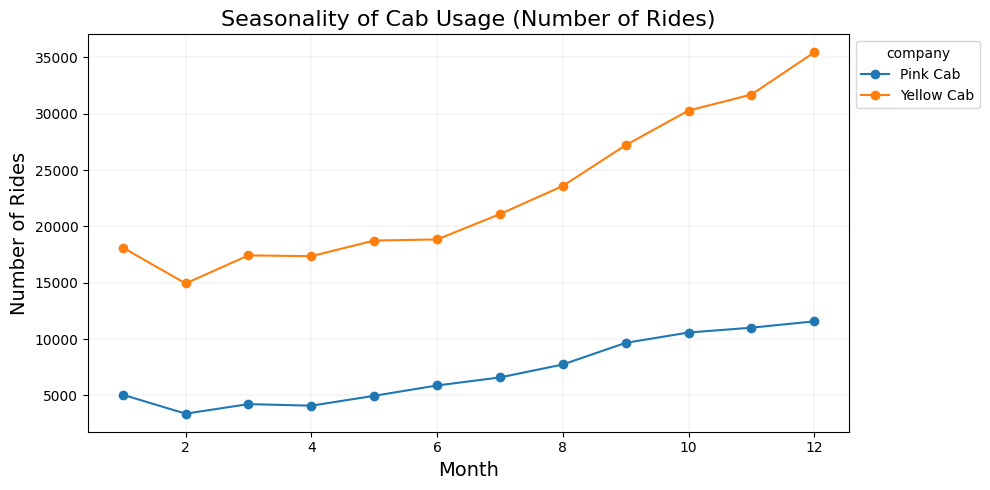

In [308]:
# Group by Month and Year to see seasonality trends
monthly_rides = cab_full_data.groupby(['Month','Company'])['Transaction ID'].count().unstack()

# Visualization
plt.figure(figsize=(10, 5))
ax= monthly_rides.plot(kind='line', marker='o', linestyle='-', figsize=(10, 5))
plt.title('Seasonality of Cab Usage (Number of Rides)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Rides', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='company', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.grid(True, which='major', axis='both', color='gray', linestyle='-', linewidth=0.1)

plt.tight_layout()
plt.show()

* The chart shows the number of rides for Pink Cab and Yellow Cab over the months, with both companies experiencing an upward trend throughout the year.
*  Yellow Cab consistently has a higher number of rides compared to Pink Cab across all months.
*  Both companies see a peak in rides around the 12th month, indicating increased cab usage during this period.

**Heatmap for Monthly Cab Demand**

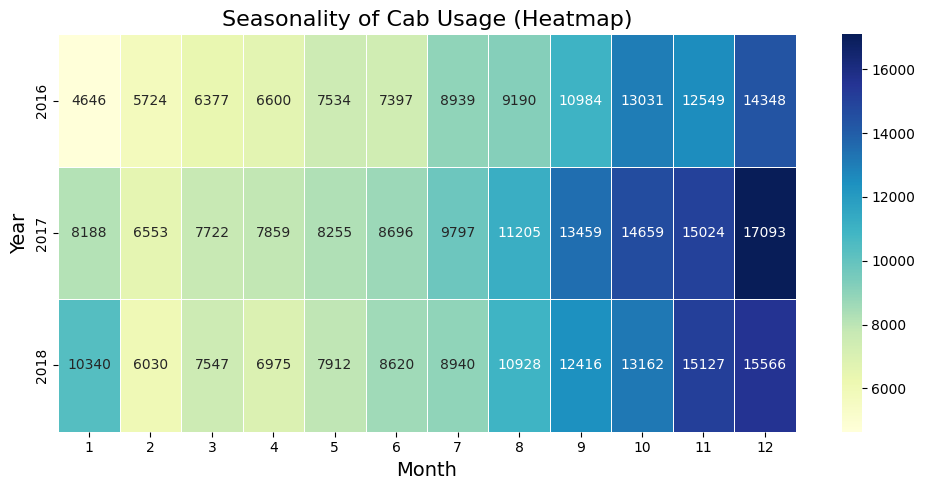

In [309]:
# Create a pivot table for heatmap (demand by year and month)
heatmap_data = cab_full_data.pivot_table(values='Transaction ID', index='Year', columns='Month', aggfunc='count')

# Draw heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=.5)

plt.title('Seasonality of Cab Usage (Heatmap)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Year', fontsize=14)
plt.tight_layout()
plt.show()

* The heatmap shows cab usage across three years (2016, 2017, 2018) with months on the x-axis.
*  Darker colors represent higher cab usage, with a color scale ranging from light yellow (low usage) to dark blue (high usage).
*  The highest cab usage is observed in the later months of each year, indicating a seasonal trend with increased demand towards the end of the year.

**Profit Margin Calculation**

In [310]:
# Adding a new column for profit margin
cab_full_data['Profit Margin'] = (cab_full_data['Price Charged'] - cab_full_data['Cost of Trip']) / cab_full_data['Price Charged']
cab_full_data[['Price Charged', 'Cost of Trip', 'Profit Margin']].head()

,Price Charged,Cost of Trip,Profit Margin
0,370.95,313.635,0.154509
1,358.52,334.854,0.066010
2,125.20,97.632,0.220192
3,377.40,351.602,0.068357
4,114.62,97.776,0.146955


In [311]:
# Define profitable rides based on Profit Margin
cab_full_data['Profitable Ride'] = cab_full_data['Profit Margin'] > 0

# Group by City and Company
profitable_rides = cab_full_data.groupby(['City', 'Company']).agg(
    Total_Rides=('Transaction ID', 'count'),
    Profitable_Rides=('Profitable Ride', 'sum')
).reset_index()

# Calculate percentage of profitable rides
profitable_rides['Profitable_Ride_Percentage'] = (
    profitable_rides['Profitable_Rides'] / profitable_rides['Total_Rides']
) * 100

# Pivot the table for visualization
profitable_rides_pivot = profitable_rides.pivot(index='City', columns='Company', values='Profitable_Ride_Percentage').fillna(0)
profitable_rides_pivot

Company,Pink Cab,Yellow Cab
City,,
ATLANTA GA,84.279228,98.515962
AUSTIN TX,92.023555,96.994716
BOSTON MA,85.846510,87.700971
CHICAGO IL,76.434142,87.954892
DALLAS TX,60.797101,99.982260
DENVER CO,66.427547,98.724805
LOS ANGELES CA,88.094639,97.646265
MIAMI FL,86.363636,98.539982
NASHVILLE TN,70.124932,87.767322


<Figure size 1200x600 with 0 Axes>

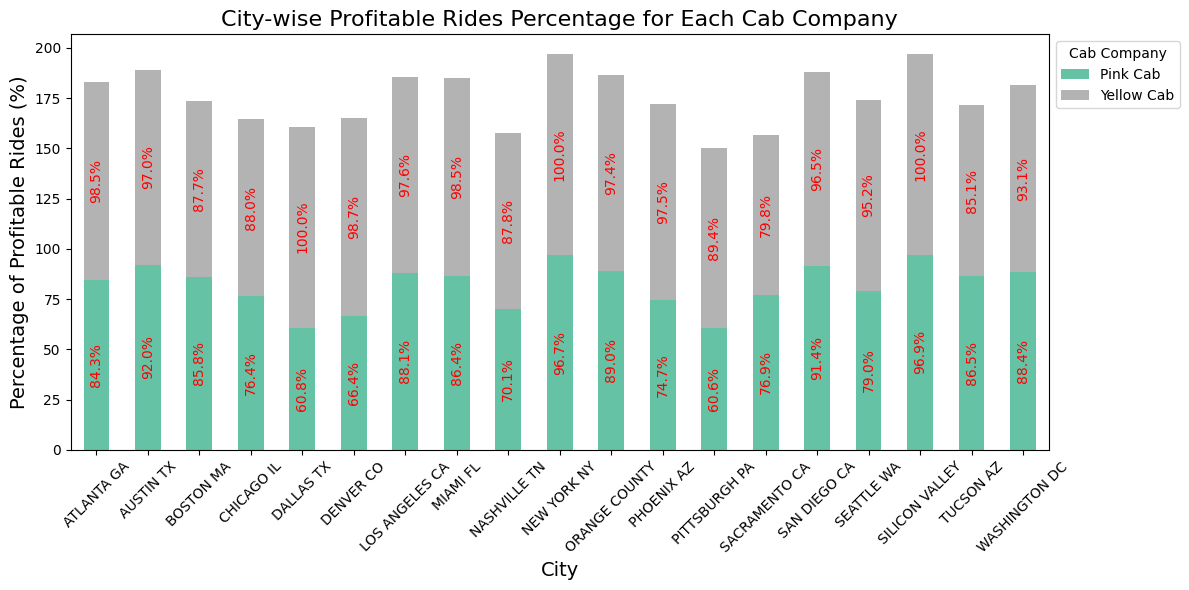

In [312]:
# Visualization: Stacked bar chart for profitable rides percentage
plt.figure(figsize=(12, 6))
ax= profitable_rides_pivot.plot(kind='bar', stacked=True, colormap='Set2', figsize=(12, 6))
plt.title('City-wise Profitable Rides Percentage for Each Cab Company', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Percentage of Profitable Rides (%)', fontsize=14)
plt.xticks(rotation=45)

for bars in ax.containers:
    # This adds the data labels on each bar
    ax.bar_label(bars, label_type='center', fmt='%.1f%%', fontsize=10, color='red', rotation=90)

plt.legend(title='Cab Company',bbox_to_anchor=(1.0, 1), loc='upper left')
plt.tight_layout()

plt.show()


* The graph compares the percentage of profitable rides between Pink Cab and Yellow Cab across various cities. For example, in ATLANTA GA, Pink Cab has 84.3% profitable rides, while Yellow Cab has 98.5%.
* Yellow Cab consistently shows a higher percentage of profitable rides in most cities, such as DALLAS TX with 100% and NEW YORK NY with 100%, compared to Pink Cab’s 60.8% and 96.7% respectively.
* This visual representation highlights the competitive edge of Yellow Cab over Pink Cab in terms of profitability across different locations, indicating potential areas for Pink Cab to improve.

**Average Profit per KM by City**

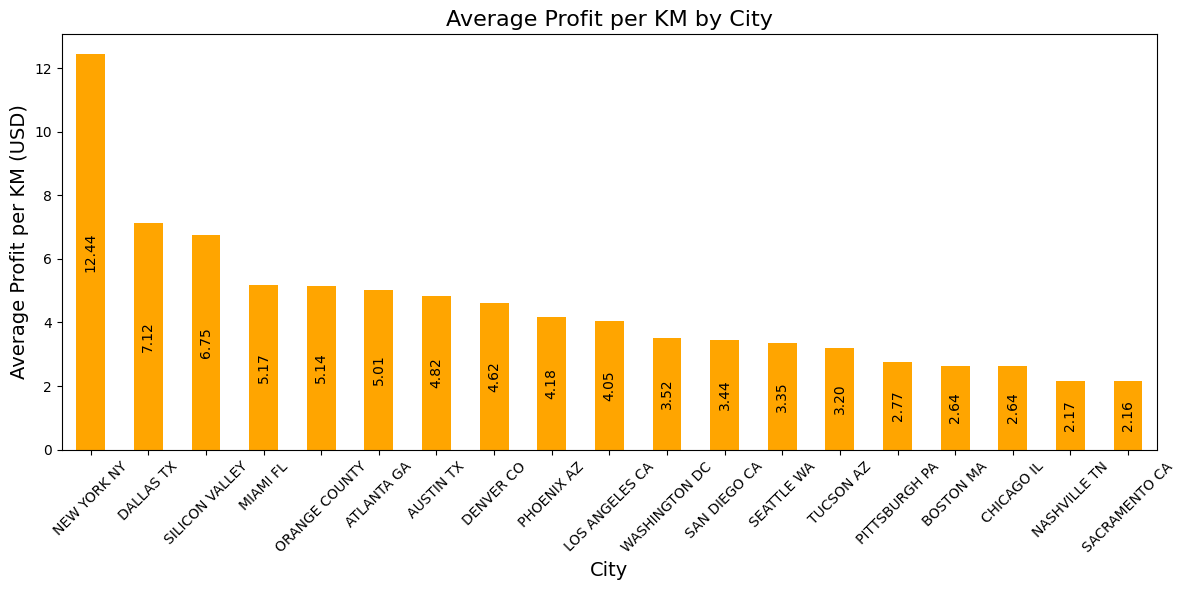

In [313]:
#  Create a column for profit per kilometer
cab_full_data['Profit per KM'] = (cab_full_data['Price Charged'] - cab_full_data['Cost of Trip']) / cab_full_data['KM Travelled']

#  Group by city and calculate the average profit per km
avg_profit_per_km = cab_full_data.groupby('City')['Profit per KM'].mean()

#  Visualization of average profit per km for each city
plt.figure(figsize=(12, 6))
ax= avg_profit_per_km.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Average Profit per KM by City', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Average Profit per KM (USD)', fontsize=14)
plt.xticks(rotation=45)

for bars in ax.containers:
     ax.bar_label(bars,labels=[f'{(label):.2f}' for label in bars.datavalues], label_type='center',  fontsize=10, color='black', rotation=90)
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

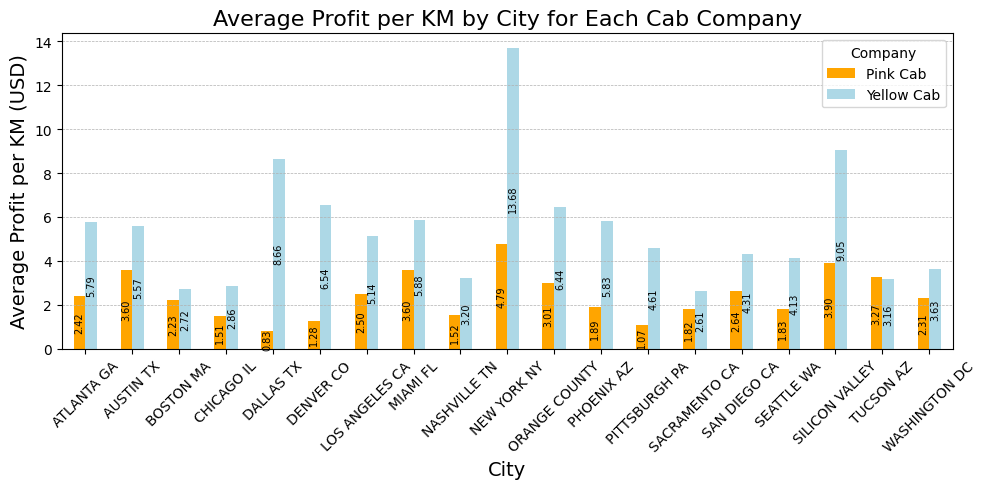

In [314]:
# Group by city and company to calculate the average profit per km
avg_profit_per_km = cab_full_data.groupby(['City', 'Company'])['Profit per KM'].mean().unstack()

#  Count customers and sum KM traveled for each company in each city
customer_counts = cab_full_data.groupby(['City', 'Company'])['Users'].sum().unstack()
km_traveled = cab_full_data.groupby(['City', 'Company'])['KM Travelled'].sum().unstack()

# Visualization of average profit per km for each city
plt.figure(figsize=(10, 5))
ax = avg_profit_per_km.plot(kind='bar', color=['orange', 'lightblue'], figsize=(10, 5))

plt.title('Average Profit per KM by City for Each Cab Company', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Average Profit per KM (USD)', fontsize=14)
plt.xticks(rotation=45)
for bars in ax.containers:
       ax.bar_label(bars,labels=[f'{(label):.2f}' for label in bars.datavalues], label_type='center',  fontsize=7, color='black', rotation=90)
plt.tight_layout()
plt.legend(title='Company')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

* The graph shows the average profit per kilometer for Pink Cab and Yellow Cab across various cities.
* Yellow Cab generally has higher average profits per KM than Pink Cab in most cities, with notable differences in cities like New York NY and Silicon Valley.
* In some cities like Boston MA and Tucson AZ, the average profits are closer but still favor Yellow Cab.

**Profit % yearwise**

In [315]:
#  Create a column for profit
cab_full_data['Profit'] = cab_full_data['Price Charged'] - cab_full_data['Cost of Trip']

#  Calculate profit percentage for each company per year
# Group by Year and Company to get profit and cost
grouped_data = cab_full_data.groupby(['Year', 'Company']).agg({'Profit': 'sum', 'Cost of Trip': 'sum'})

# Profit percentage = (Total Profit / Total Cost) * 100
grouped_data['Profit Percentage'] = (grouped_data['Profit'] / grouped_data['Cost of Trip']) * 100

# Reset index to get a clean DataFrame for plotting
grouped_data = grouped_data.reset_index()

# Pivot the table to get years as index and companies as columns
profit_percentage_pivot = grouped_data.pivot(index='Year', columns='Company', values='Profit Percentage')
profit_percentage_pivot


Company,Pink Cab,Yellow Cab
Year,,
2016,27.659727,56.719546
2017,26.953767,56.683707
2018,21.427914,48.213674


<Figure size 1000x500 with 0 Axes>

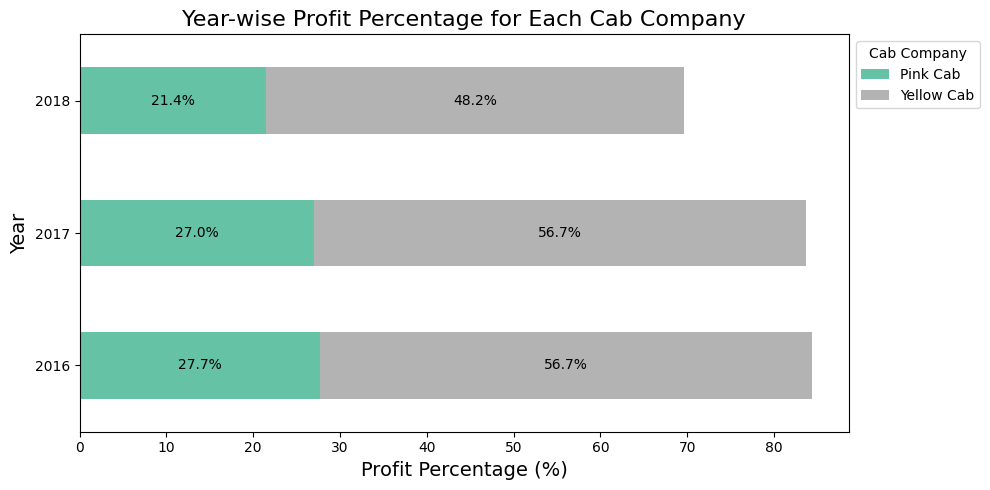

In [316]:
#  Visualization - Stacked Bar Chart
plt.figure(figsize=(10, 5))
# Plot stacked horizontal bar chart
ax = profit_percentage_pivot.plot(kind='barh', stacked=True, colormap='Set2', figsize=(10, 5))

for bars in ax.containers:
    ax.bar_label(bars, label_type='center',fmt='%.1f%%', fontsize=10, color='black')
plt.title('Year-wise Profit Percentage for Each Cab Company', fontsize=16)
plt.xlabel('Profit Percentage (%)', fontsize=14)
plt.ylabel('Year', fontsize=14)
plt.legend(title='Cab Company', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.tight_layout()
plt.show()

* The graph shows the profit percentages for Pink Cab and Yellow Cab from 2016 to 2018.
* Yellow Cab consistently outperformed Pink Cab in profit percentage across all three years, although its profit percentage decreased significantly from 56.7% in 2017 to 48.2% in 2018.
* Trend: Pink Cab’s profit percentage remained relatively stable around 27%, with a slight increase in 2018 to 21.4%.

**Rides analysis daily basis** 

In [317]:
# First, ensure that there is a 'Day of Week' column in the dataset (0=Monday, 6=Sunday)
cab_full_data['Day of Week'] = cab_full_data['Date of Travel'].dt.dayofweek

# Group by Day of Week and Company for both rides and users
daywise_rides_customers = cab_full_data.groupby(['Day of Week', 'Company']).agg(
    Rides=('Transaction ID', 'count'),     # Count rides
    Users=('Users', 'sum')                 # Sum of users
).reset_index()
daywise_rides_customers

,Day of Week,Company,Rides,Users
0,0,Pink Cab,7032,878530611
1,0,Yellow Cab,22705,3856045067
2,1,Pink Cab,7077,887121442
3,1,Yellow Cab,22783,3823278499
4,2,Pink Cab,7076,888909704
5,2,Yellow Cab,23026,3883552750
6,3,Pink Cab,9549,1205176600
7,3,Yellow Cab,30198,5063455298
8,4,Pink Cab,19249,2431694180
9,4,Yellow Cab,62153,10460571399


<Figure size 1000x500 with 0 Axes>

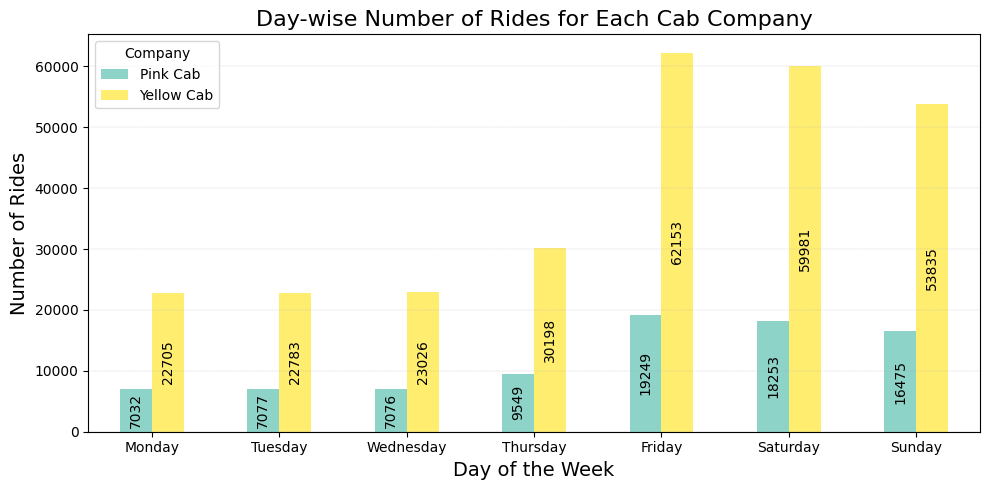

In [318]:
# Pivot the table to get a day-wise comparison for both companies
rides_pivot = daywise_rides_customers.pivot(index='Day of Week', columns='Company', values='Rides')
users_pivot = daywise_rides_customers.pivot(index='Day of Week', columns='Company', values='Users')

# Bar chart for rides
plt.figure(figsize=(10, 5))
ax=rides_pivot.plot(kind='bar', figsize=(10, 5), colormap='Set3')
plt.title('Day-wise Number of Rides for Each Cab Company', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Rides', fontsize=14)

# Set tick positions and corresponding labels
tick_positions = range(len(rides_pivot.index))  # Assuming 0 to 6 for Monday to Sunday
tick_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(tick_positions, tick_labels, rotation=0)
plt.legend(title='Company')

for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=10, color='black', rotation=90)

plt.grid(True, axis='y', linestyle='--', linewidth=0.2)
plt.tight_layout()
plt.show()

* The graph shows the number of rides for Pink Cab and Yellow Cab across different days of the week.
* Yellow Cab consistently has a higher number of rides than Pink Cab on all days, with the highest numbers occurring on Fridays and Saturdays for both companies.
* This indicates that Yellow Cab is more popular overall, especially on peak days like Fridays and Saturdays.

<Figure size 1000x500 with 0 Axes>

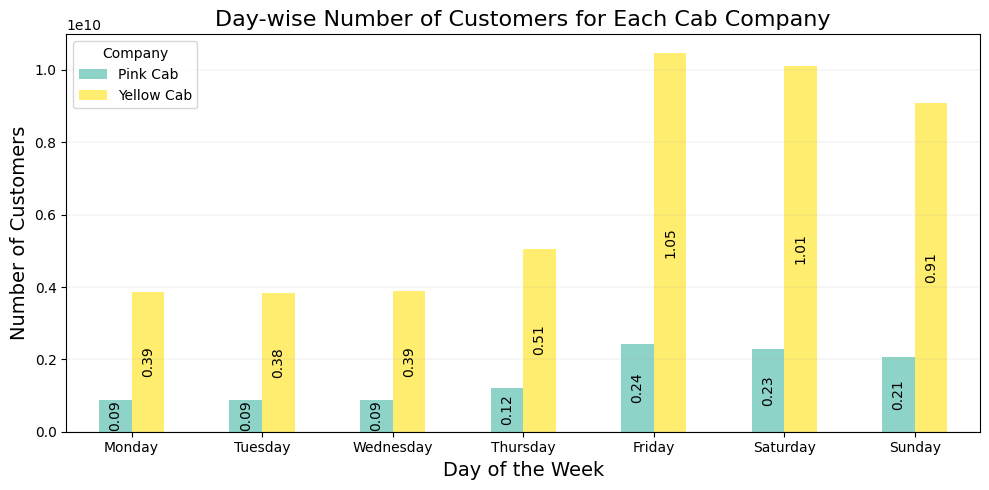

In [319]:
# Bar chart for users
plt.figure(figsize=(10, 5))
ax=users_pivot.plot(kind='bar', figsize=(10, 5), colormap='Set3')

plt.title('Day-wise Number of Customers for Each Cab Company', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
# Set tick positions and corresponding labels
tick_positions = range(len(rides_pivot.index))  # Assuming 0 to 6 for Monday to Sunday
tick_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(tick_positions, tick_labels, rotation=0)

for bars in ax.containers:
    ax.bar_label(bars,labels=[f'{(label / 1e10):.2f}' for label in bars.datavalues], label_type='center', fontsize=10, color='black', rotation=90)
    
plt.legend(title='Company')
plt.grid(True, axis='y', linestyle='--', linewidth=0.2)
plt.tight_layout()
plt.show()

* The graph shows the number of customers for Pink Cab and Yellow Cab across different days of the week.
*  Yellow Cab consistently has more customers than Pink Cab every day, with both companies peaking on Friday and having their lowest numbers on Tuesday.
*  This indicates that Yellow Cab is more popular overall, especially on peak days like Friday.

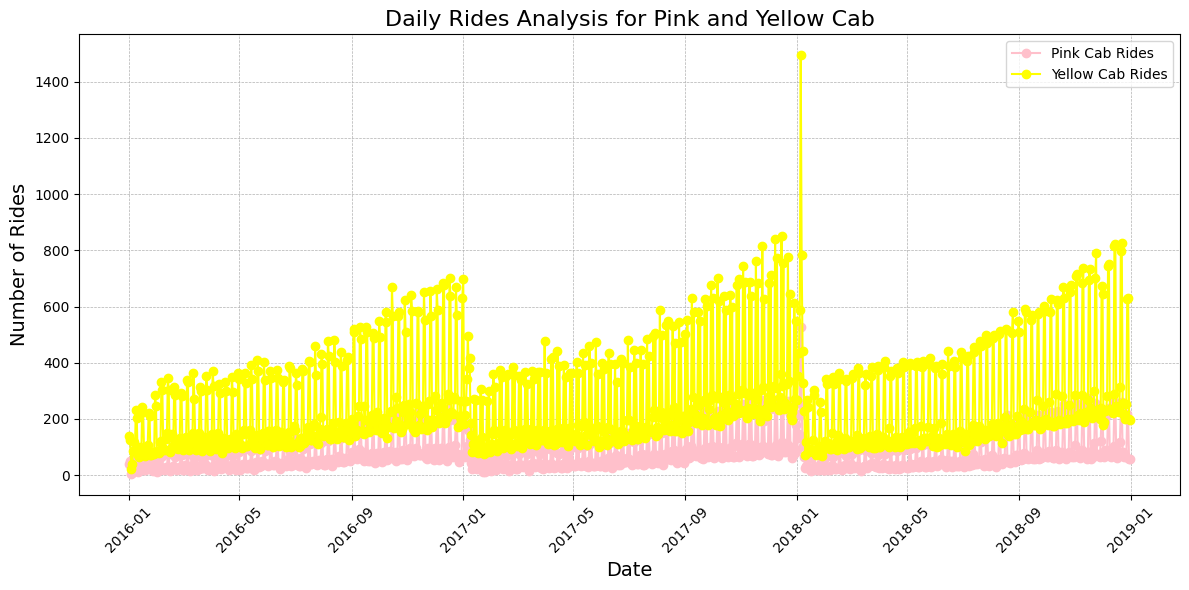

In [320]:
# Extract the date portion
cab_full_data['Date'] = cab_full_data['Date of Travel'].dt.date

# Group by Date and Company to count rides for each day
daily_rides = cab_full_data.groupby(['Date', 'Company'])['Transaction ID'].count().unstack().fillna(0).reset_index()

# Rename columns for clarity
daily_rides.columns = ['Date', 'Pink Cab Rides', 'Yellow Cab Rides']# Plot line chart for daily rides
plt.figure(figsize=(12, 6))

# Plot for both companies
plt.plot(daily_rides['Date'], daily_rides['Pink Cab Rides'], label='Pink Cab Rides', color='pink', marker='o')
plt.plot(daily_rides['Date'], daily_rides['Yellow Cab Rides'], label='Yellow Cab Rides', color='yellow', marker='o')

# Add titles and labels
plt.title('Daily Rides Analysis for Pink and Yellow Cab', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Rides', fontsize=14)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Profit Forecast 

In [321]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

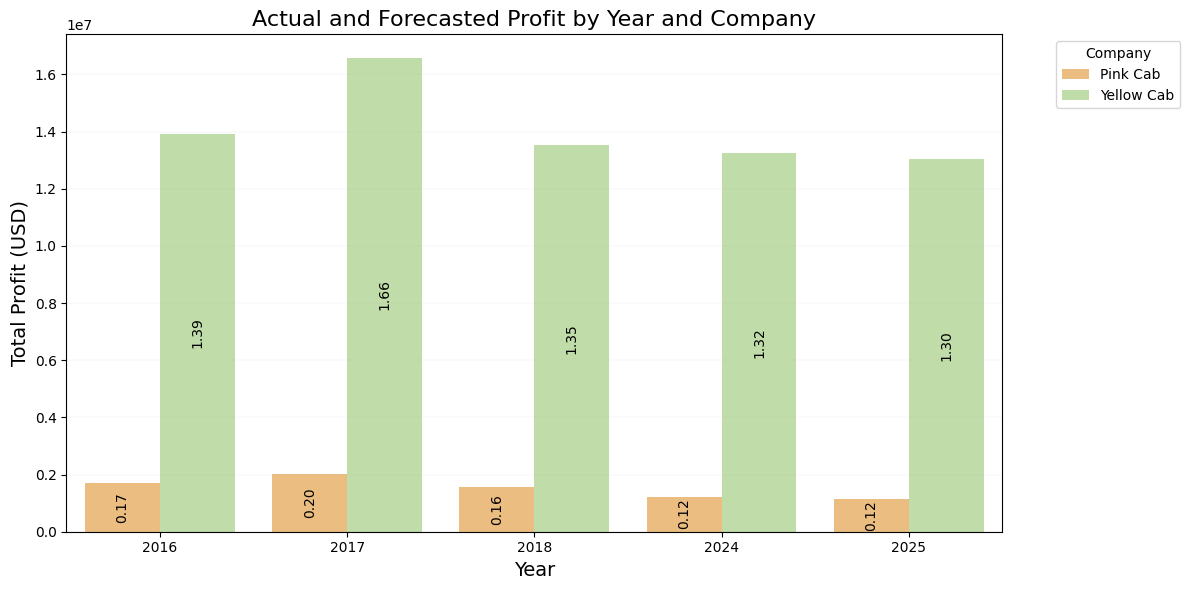

In [322]:
#  Aggregate data by company and year to get total profit
annual_profit = cab_full_data.groupby(['Year', 'Company'])['Profit'].sum().reset_index()

#  Prepare a function to forecast for each company
def forecast_future_profits(company_data, company_name):
    # Extract the years and profits for this company
    years = company_data['Year'].values.reshape(-1, 1)
    profits = company_data['Profit'].values.reshape(-1, 1)

    # Train a linear regression model
    model = LinearRegression()
    model.fit(years, profits)

    # Predict profits for future years (2024 and 2025)
    future_years = np.array([[2024], [2025]])
    future_profits = model.predict(future_years)

    # Create a DataFrame for future profits for this company
    future_profit_df = pd.DataFrame({
        'Year': future_years.flatten(),
        'Profit': future_profits.flatten(),
        'Company': company_name
    })

    return future_profit_df

#  Forecast profits for both Yellow Cab and Pink Cab
yellow_cab_data = annual_profit[annual_profit['Company'] == 'Yellow Cab']
pink_cab_data = annual_profit[annual_profit['Company'] == 'Pink Cab']

# Forecasting for Yellow Cab and Pink Cab
future_yellow_cab = forecast_future_profits(yellow_cab_data, 'Yellow Cab')
future_pink_cab = forecast_future_profits(pink_cab_data, 'Pink Cab')

# Combine actual and forecasted profits
combined_profit = pd.concat([annual_profit, future_yellow_cab, future_pink_cab], ignore_index=True)

#  Visualization
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Year', y='Profit', hue='Company', data=combined_profit, palette='Spectral')

plt.title('Actual and Forecasted Profit by Year and Company', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Profit (USD)', fontsize=14)

# Adding values on bars
for bars in ax.containers:
    ax.bar_label(bars, labels=[f'{(label / 1e7):.2f}' for label in bars.datavalues], label_type='center', fontsize=10, color='black', rotation=90)

plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', linewidth=0.1)
plt.tight_layout()
plt.show()


The bar chart illustrates the actual and forecasted profits for Pink Cab and Yellow Cab from 2016 to 2025. Yellow Cab consistently outperforms Pink Cab in total profits, with significant earnings in 2016 and 2017, while Pink Cab's profits are notably lower across all years. The profits for both companies are forecasted to decrease slightly in the upcoming years (2024 and 2025), with Pink Cab remaining much lower than Yellow Cab.

# Conclusion And Recommendation:
Based on the detailed analysis,here are the conclusions and recommendations:

**Detailed Conclusion:**

**Profitability:** 
* Yellow Cab consistently outperforms Pink Cab in terms of profit percentages and total profits from 2016 to 2018, and this trend is expected to continue into the forecasted years (2024-2025).
* Yellow Cab’s profit percentages are significantly higher, indicating better financial health and operational efficiency.

**Customer Base and Ride Volume:** 
* Yellow Cab has a higher number of rides and customers on all days of the week, with peak numbers on Fridays and Saturdays.
* This suggests a stronger market presence and higher customer preference for Yellow Cab services.

**Growth Trends:**
* Yellow Cab shows more variability in daily rides with a notable spike around late 2017, indicating potential for rapid growth or successful marketing strategies.
* Pink Cab maintains a relatively steady trend, which might indicate stable but slower growth.

**Market Performance:**
Yellow Cab’s consistent higher performance across various metrics (profit, ride volume, customer base) highlights its competitive edge in the market.
Pink Cab, while stable, does not match the growth and profitability metrics of Yellow Cab.

**Recommendations:**

**Investment Opportunity:**
* Yellow Cab is a more attractive investment opportunity for XYZ due to its higher profitability, larger customer base, and positive growth trends.
* Investing in Yellow Cab could yield better returns given its market dominance and financial performance.

**Strategic Focus for Pink Cab:**
* Pink Cab should focus on strategies to increase its market share, such as targeted marketing campaigns, improving service quality, and exploring new markets.
* Enhancing customer loyalty programs and competitive pricing could help Pink Cab attract more customers and increase ride volumes.

**Monitoring Market Trends:**
* Continuously monitor market trends and customer preferences to adapt strategies accordingly.
* Both companies should leverage data analytics to identify peak times, customer behavior, and areas for improvement.

**Innovation and Technology:**
* Investing in technology and innovation can help both companies improve operational efficiency and customer experience.
* Implementing advanced booking systems, real-time tracking, and customer feedback mechanisms can enhance service quality.

**Sustainability Initiatives:**
* Both companies should consider sustainability initiatives to appeal to environmentally conscious customers.
* Introducing electric or hybrid vehicles and promoting eco-friendly practices can enhance brand image and attract a broader customer base.

By focusing on these recommendations, XYZ can make informed investment decisions and both cab companies can improve their market performance and customer satisfaction.
